In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

## Two tailed z-test

Here we want to test if the population mean is equal to $\mu_0$

$
\left\{
\begin{array}{ll}
  H_0 : \mu = \mu_0 \\
  H_1 : \mu \neq \mu_0
\end{array}
\right.
$

Suppose we need to check if the age of a certain population is by mean 30 years. <br/>
We assume that population ages are normally distributed and have variance 20. <br/>
Our sample has size 10 and mean 27 years <br/>

$
\left\{
\begin{array}{ll}
  H_0 : \mu = 30 \\
  H_1 : \mu \neq 30
\end{array}
\right.
$

First compute the z-value: <br/>
$$
\frac{\mu_x - \mu_0}{s}
$$ <br/>
where n is the sample size, $\mu_x$ is the sample mean (27) and s is the sample typical deviation <br/>
s can be estimated using the population variance
$$
s^2 = \frac{\sigma^2}{n} => s = \sqrt{\frac{\sigma^2}{n}}
$$

$$
z = \frac{\mu_x - \mu_0}{\sqrt{\frac{\sigma^2}{n}}}
$$

In [85]:
z = (27 - 30) / np.sqrt(20 / 10)
z = np.abs(z)

In [86]:
print('z-value is: ', np.abs(z).round(4))

z-value is:  2.1213


And the next step is to compute the p-value. <br/>
$p = 2 * P[X > |z|] = 2 * (1 - P[X < |z|]) = 2 * (1 - \phi(|z|))$ <br/>
where \phi is the cumulative distribution function (cdf) from the standard normal distribution <br/>
Note the factor 2 in the formula. This is because the test is two-tailed

In [88]:
p = 2 * (1 - norm.cdf(z))
print('p-value is:', np.round(p, 4))

p-value is: 0.0339


Now we only need to compare the p-value with the level of significance ($\alpha$). <br/>
If p-value > $\alpha$ then we accept the null hypothesis. Otherwise its rejected

In [89]:
alpha = 0.05
if p > alpha:
    print('Null hypothesis accepted')
    print('We can conclude that statistically the population mean age is equal to 30 '+
          'with a confident interval of {}%'.format((1 - alpha) * 100))
else:
    print('Null hypothesis rejected')
    print('We can conclude that statistically the population mean age is different than 30 '+
          'with a confident interval of {}%'.format((1 - alpha) * 100))

Null hypothesis rejected
We can conclude that statistically the population mean age is different than 30 with a confident interval of 95.0%


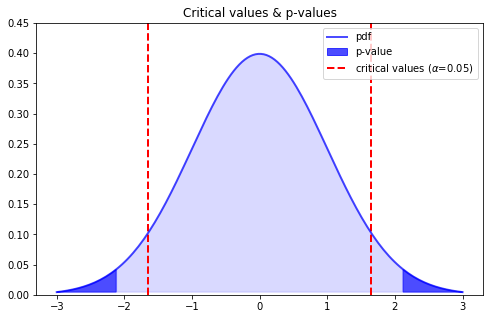

In [133]:
plt.figure(figsize=(8, 5))
x = np.linspace(-3, 3, 150)
y = norm.pdf(x)

xl, xr = np.concatenate((x[x <= -z], [-z])), np.concatenate(([z], x[x >= z]))
xm = x[(x > -z) & (x < z)]
yl, yr, ym = norm.pdf(xl), norm.pdf(xr), norm.pdf(xm)

plt.fill(np.concatenate(([xm[0]], xm, [xm[-1]])), np.concatenate(([y.min()], ym, [y.min()])),
         color='blue', alpha=0.15, label='_nolegend_')

plt.fill(np.concatenate((xl, [xl[-1]])), np.concatenate((yl, [y.min()])),
        color='blue', alpha=0.7)

plt.fill(np.concatenate(([xr[0]], xr)), np.concatenate(([y.min()], yr)),
        color='blue', alpha=0.7, label='_nolegend_')

plt.plot(x, y, linewidth=2, color='blue', alpha=0.7)
plt.vlines([norm.ppf(1 - alpha), norm.ppf(alpha)],
           ymin=0, ymax=1, linewidth=2, linestyles='--', color='red')


plt.ylim([0, 0.45])
plt.legend(['pdf', 'p-value', 'critical values ($\\alpha$=0.05)'])
plt.title('Critical values & p-values');

## One tailed z-test

Continuing the example above, now we want to test if the population age mean is lower than 25 years. <br/>
This time we will use a one-tailed z-test 

$
\left\{
\begin{array}{ll}
  H_0 : \mu = \mu_0 \\
  H_1 : \mu < \mu_0
\end{array}
\right.
$

The null hypothesis is the same; It states that the mean is 25. But the alternative hypothesis will indicate if true that mean age is under 25

The z-value is calculated as in the two-tailed test

In [142]:
z = (27 - 25) / np.sqrt(20 / 10)
z = np.abs(z)
print('z-value is: ', z)

z-value is:  1.414213562373095


But now p-value is: <br/>
$p = P[X > |z|] = 1 - P[X < |z|] = 1 - \phi(|z|)$

In [146]:
p = 1 - norm.cdf(z)
p

0.07864960352514261

And again compre $\alpha$ with the p-value

In [148]:
if p > alpha:
    print('Null hypothesis accepted')
    print('We cant assume statistically that population age mean is lower than ' +
         '25 years with a confident interval of {}%'.format((1 - alpha) * 100))
else:
    print('Null hypothesis rejected')
    print('We can say statistically that population age mean is lower than 25 years ' +
         'with a confident interval of {}%'.format((1 - alpha) * 100))

Null hypothesis accepted
We cant assume statistically that population age mean is lower than 25 years with a confident interval of 95.0%


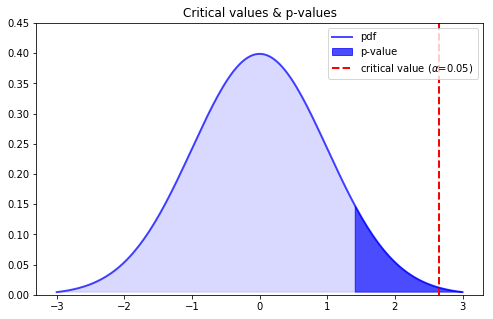

In [154]:
plt.figure(figsize=(8, 5))
x = np.linspace(-3, 3, 150)
y = norm.pdf(x)

xl, xr = np.concatenate((x[x <= z], [z])), np.concatenate(([z], x[x >= z]))
yl, yr = norm.pdf(xl), norm.pdf(xr)

plt.fill(np.concatenate((xl, [xl[-1]])), np.concatenate((yl, [y.min()])),
         color='blue', alpha=0.15, label='_nolegend_')

plt.fill(np.concatenate(([xr[0]], xr)), np.concatenate(([y.min()], yr)),
        color='blue', alpha=0.7)

plt.plot(x, y, linewidth=2, color='blue', alpha=0.7)
plt.vlines([1 - norm.ppf(alpha)],
           ymin=0, ymax=1, linewidth=2, linestyles='--', color='red')

plt.ylim([0, 0.45])
plt.legend(['pdf', 'p-value', 'critical value ($\\alpha$=0.05)'])
plt.title('Critical values & p-values');